# LAB3: PCA + conjunto de dados MNIST

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Duarte Gonçalves
## Número: 46484

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab3.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Conjunto de dados $\texttt{MNISTsmall.p}$:

# Pergunta 1: Considere os dígitos "3", "8" e "9"  dos dados (3000 dígitos de treino e 1500 de teste).
## a) Calcule a matriz de PCA para os 3000 dígitos de treino. Use um número de componentes principais de modo aos dados projetados terem $95\%$ da variância total dos dados originais. Especifique (imprima) qual o número de componentes obtidas. 
## b) Visualize em forma de imagem, as três primeiras componetes principais (3 imagens de $28\times28$).
## c) Aplique a transformação PCA ao primeiro dígito "3" e ao primeiro dígito "8" do conjunto de teste. Visualize em forma de imagem os dígitos originais e os dígitos reconstruídos após a transformação PCA inversa.


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle

In [89]:
D = pickle.load(open('MNISTsmall.p', 'rb'))
print('Keys: ', D.keys())

X  = D['X']*1.0
y  = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']
X1, X2 = X[:, f1], X[:, f2]
y1, y2 = y[f1], y[f2]

X1 = X1[:, (y1==3) | (y1==8) | (y1==9)]
X2 = X2[:, (y2==3) | (y2==8) | (y2==9)]
y1 = y1[(y1==3) | (y1==8) | (y1==9)]
y2 = y2[(y2==3) | (y2==8) | (y2==9)]

print('Dados de Treino: ',X1.shape)
print('Dados de Teste:  ',X2.shape)

Keys:  dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])
Dados de Treino:  (784, 3000)
Dados de Teste:   (784, 1500)


In [90]:
#A) 
Cx   = np.cov(X1)
u, V = la.eig(Cx)

u = u.real
V = V.real
idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

cond = np.var(X1,axis=1)>0.95
val = len(u[cond])

print('Número de Componentes Obtidas : ', val)
W = V[:, :val]


Número de Componentes Obtidas :  581


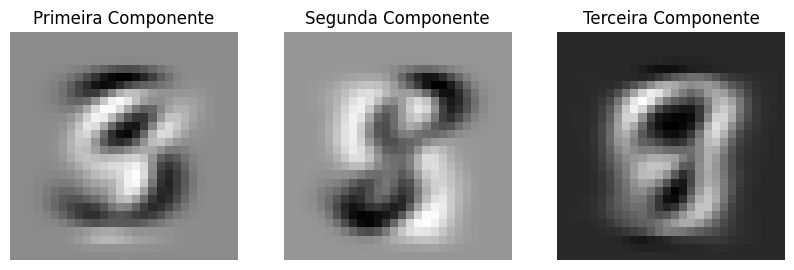

In [91]:
#B)
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(W[:,0].reshape((28, 28)), cmap='binary')
plt.title('Primeira Componente')
plt.axis('off')
plt.subplot(132)
plt.imshow(W[:,1].reshape((28, 28)), cmap='binary') 
plt.title('Segunda Componente')
plt.axis('off')
plt.subplot(133)
plt.imshow(W[:,2].reshape((28, 28)), cmap='binary') 
plt.title('Terceira Componente')
plt.axis('off')
plt.show()

TypeError: Invalid shape (784,) for image data

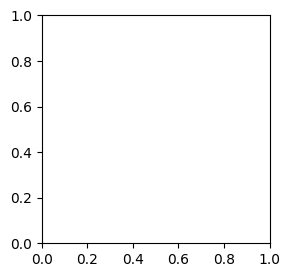

In [102]:
#C


# Pergunta 2: Considere todos os dados
## a) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $75\%$ da variância total dos dados e aplique a transformação aos dados de treino e teste. 
## b) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados de treino transformados, e calcule a matriz de confusão e o número total de erros nos dados de teste transformados.
## c) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $75\%$ da variância total dos dados e os dados transformardos terem média nula e variância unitária em cada dimensão. Aplique a transformação aos dados de treino e teste. 
## d) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados transformados da alínea anterior, e calcule a matriz de confusão e o número total de erros nos dados de teste.

In [93]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

In [94]:
#A)
pca = PCA(n_components = .75).fit(X1.T)
X1p = pca.transform(X1.T)
X2p = pca.transform(X2.T)

print('Dados de Treino Transformados com PCA: ', X1p.shape)
print('Dados de  Teste Transformados com PCA: ', X2p.shape)

Dados de Treino Transformados com PCA:  (3000, 32)
Dados de  Teste Transformados com PCA:  (1500, 32)


In [95]:
#B)
svm.fit(X1p, y1)
y2e = svm.predict(X2p) 
print('Matriz de Confusão: \n', confusion_matrix(y2, y2e))
print('Número Total de Erros: ', np.sum(y2 != y2e))

Matriz de Confusão: 
 [[491   5   4]
 [ 13 483   4]
 [  9  11 480]]
Número Total de Erros:  46


In [96]:
# C)
pca = PCA(n_components = .75).fit(X1.T)
X1p = pca.transform(X1.T)
X2p = pca.transform(X2.T)

m = np.mean(X1p,axis=1)[:,np.newaxis]
X1n = X1p-m
m2 = np.mean(X2p,axis=1)[:,np.newaxis]
X2n = X2p-m2


In [97]:
# D)
svm.fit(X1n, y1)
y2e = svm.predict(X2n) 
print('Matriz de Confusão: \n', confusion_matrix(y2, y2e))
print('Número Total de Erros: ', np.sum(y2 != y2e))

Matriz de Confusão: 
 [[490   6   4]
 [ 13 482   5]
 [  9  11 480]]
Número Total de Erros:  48
